<a href="https://colab.research.google.com/github/jader-lima/TimeSeriesLSTM/blob/master/Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd

In [74]:
url = 'https://raw.githubusercontent.com/jader-lima/TimeSeriesLSTM/master/passageiros.csv'
passageiros = pd.read_csv(url, error_bad_lines=False)


In [75]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


Cada mes é 0.083333

In [76]:
0.083333

0.083333

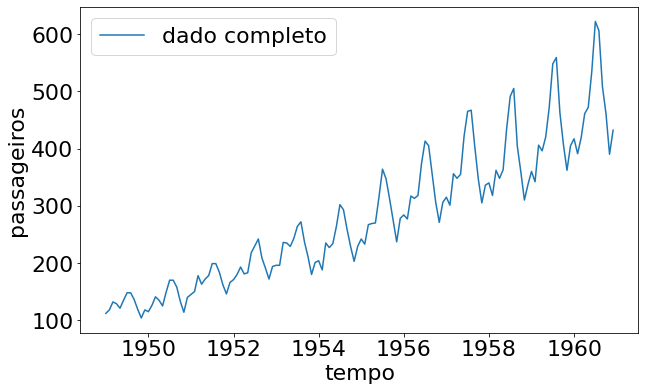

In [77]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

sns.lineplot(x='tempo', y = 'passageiros',data=passageiros, label='dado completo')

In [78]:
from sklearn.preprocessing import StandardScaler


In [79]:
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
dados_escalado = sc.transform(passageiros)

In [81]:
x = dados_escalado[:,0]
y = dados_escalado[:,1]

Text(0.5, 0, 'Data')

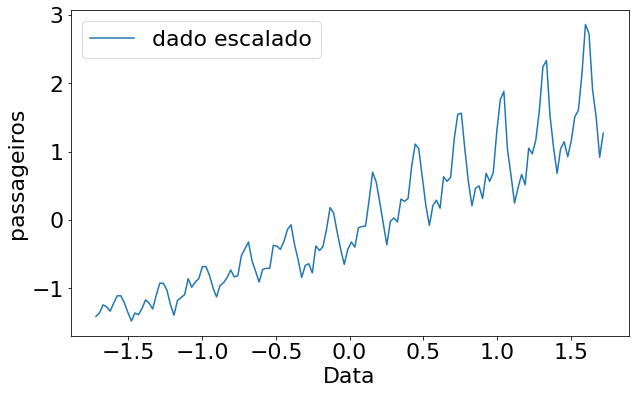

In [82]:
import matplotlib.pyplot as plt
sns.lineplot(x=x, y = y, label='dado escalado')
plt.ylabel('passageiros')
plt.xlabel('Data')

In [83]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [84]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [85]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

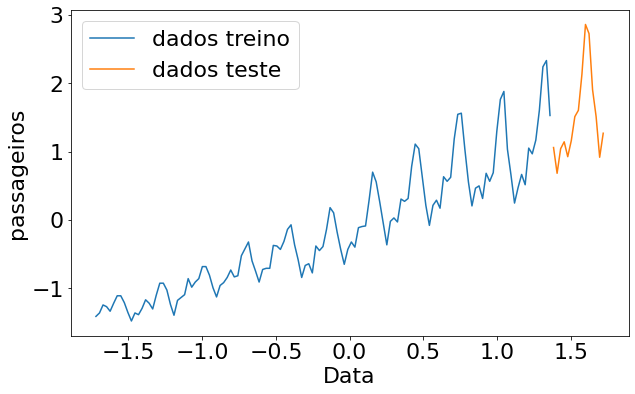

In [86]:
import matplotlib.pyplot as plt
sns.lineplot(x=xtreino, y = ytreino , label='dados treino')
sns.lineplot(x=xteste, y = yteste , label='dados teste')
plt.ylabel('passageiros')
plt.xlabel('Data')

Regressão linear com Rede Neural

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [88]:
regressor = Sequential()

Z = Wx + b , onde :

*   W é um peso,no caso iniciado com 1.
*   b é o bias, ou vies.
*   x é a variavel tempo.

Activation linear seria a função de ativação aplicada no resultado de Wx + b, no keras o padrão para função linear é 1, ou seja , multiplica o Z obtido por 1.

Função de custo Erro Quadrativo Médio, mede a diferença da estimativa.
O algoritmo de otimização busca minimizar o valor da função de custo, assim , o algoritmo de otimização ajusta a o Peso e o Bias.
O Otimizador utilizado foi o adam, é que um metodo de gradiente descendente estocástico.

In [89]:
regressor.add(Dense(1,input_dim=1, kernel_initializer='Ones', activation='linear' ,use_bias=True))

In [90]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [91]:
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [92]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 1ms/step - loss: 0.1285


In [93]:
y_predict = regressor.predict(xtreino)

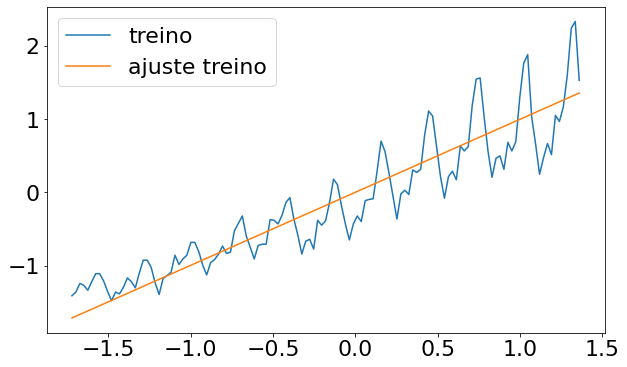

In [94]:
sns.lineplot(x=xtreino, y = ytreino , label='treino')
sns.lineplot(x=xtreino, y = y_predict[:,0] , label='ajuste treino')


In [95]:
regressor1 = Sequential()

In [96]:
regressor1.add(Dense(1,input_dim=1, kernel_initializer='Ones', activation='linear' ,use_bias=False))

In [97]:
regressor1.compile(loss='mean_squared_error',optimizer='adam')

In [98]:
regressor1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [99]:
regressor1.fit(xtreino, ytreino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1285


In [100]:
y_predict1 = regressor1.predict(xtreino)

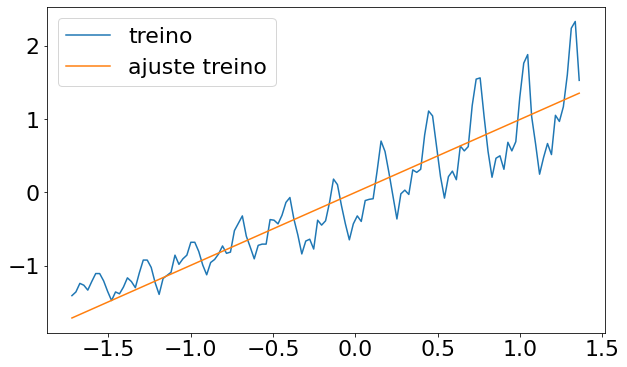

In [101]:
sns.lineplot(x=xtreino, y = ytreino , label='treino')
sns.lineplot(x=xtreino, y = y_predict1[:,0] , label='ajuste treino')

In [102]:
d = {'tempo':xtreino,'passageiros':y_predict1[:,0]}

In [103]:
resultados = pd.DataFrame(data=d)

In [104]:
resultados

,tempo,passageiros
0,-1.720064,-1.712373
1,-1.696007,-1.688424
2,-1.671950,-1.664475
3,-1.647894,-1.640526
4,-1.623837,-1.616576
...,...,...
124,1.262984,1.257337
125,1.287041,1.281286
126,1.311098,1.305236
127,1.335155,1.329185


In [105]:
resultado_transf = sc.inverse_transform(resultados)

In [106]:
resultado_transf = pd.DataFrame(resultado_transf)


In [107]:
resultado_transf.columns = ['tempo','passageiros']

In [108]:
resultado_transf.head()


,tempo,passageiros
0,1949.000000,75.586001
1,1949.083333,78.449113
2,1949.166667,81.312239
3,1949.250000,84.175350
4,1949.333333,87.038462


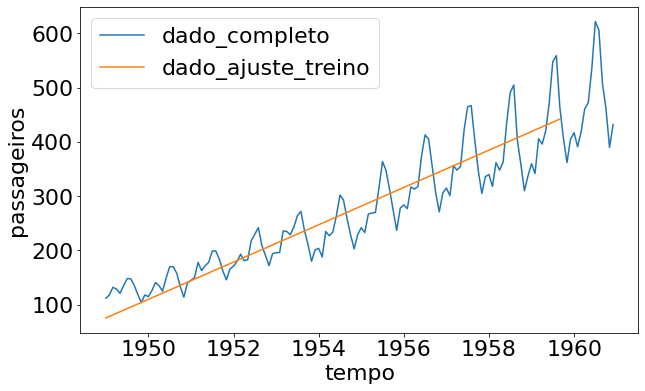

In [109]:
sns.lineplot(x='tempo', y = 'passageiros' ,data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y = 'passageiros' ,data=resultado_transf, label='dado_ajuste_treino')


In [110]:
y_predict_teste = regressor1.predict(xteste)

In [111]:
d = {'tempo':xteste,'passageiros':y_predict_teste[:,0]}

In [112]:
resultados_teste = pd.DataFrame(data=d)

In [113]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [114]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)


In [115]:
resultado_transf_teste.columns = ['tempo','passageiros']

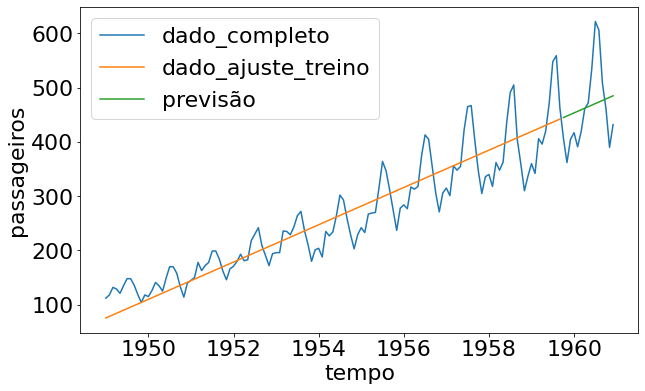

In [116]:
sns.lineplot(x='tempo', y = 'passageiros' ,data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y = 'passageiros' ,data=resultado_transf, label='dado_ajuste_treino')
sns.lineplot(x='tempo', y = 'passageiros' ,data=resultado_transf_teste, label='previsão')

In [117]:
regressor2 = Sequential()

In [118]:
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform', activation='linear' ,use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='linear' ,use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear' ,use_bias=False))

In [119]:
regressor2.compile(loss='mean_squared_error',optimizer='adam')

In [120]:
regressor2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 8         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [121]:
regressor2.fit(xtreino,ytreino,epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8093
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8087
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8080
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8070
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8055
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8034
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8004
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7962
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7907
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7833
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7746
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7626
Epoch 13/200
5/5 [==============================] - 0s 2ms/st

In [122]:
y_predict2 = regressor2.predict(xtreino)

In [123]:
y_predict2_teste =  regressor2.predict(xteste)

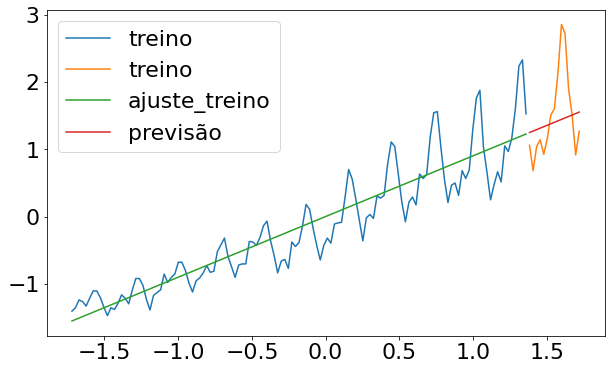

In [124]:
sns.lineplot(x=xtreino, y =ytreino , label='treino')
sns.lineplot(x=xteste, y = yteste ,label='treino')
sns.lineplot(x=xtreino, y = y_predict2[:,0] ,label='ajuste_treino')
sns.lineplot(x=xteste, y = y_predict2_teste[:,0], label='previsão')


In [125]:
regressor3 = Sequential()

In [126]:
regressor3.add(Dense(8,input_dim=1, kernel_initializer='random_uniform', activation='sigmoid' ,use_bias=False))
regressor3.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid' ,use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear' ,use_bias=False))

In [127]:
regressor3.compile(loss='mean_squared_error',optimizer='adam')

In [128]:
regressor3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 8)                 8         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [129]:
regressor3.fit(xtreino,ytreino,epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8002
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7962
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7930
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7914
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7913
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7910
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7903
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7890
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7876
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7857
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7841
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7832
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

In [130]:
y_predict3 = regressor3.predict(xtreino)

In [131]:
y_predict3_teste =  regressor3.predict(xteste)

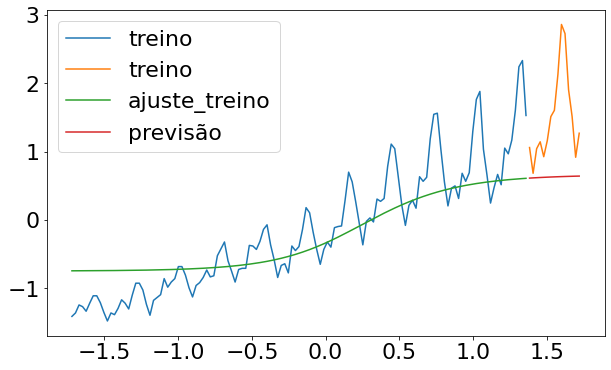

In [132]:
sns.lineplot(x=xtreino, y =ytreino , label='treino')
sns.lineplot(x=xteste, y = yteste ,label='treino')
sns.lineplot(x=xtreino, y = y_predict3[:,0] ,label='ajuste_treino')
sns.lineplot(x=xteste, y = y_predict3_teste[:,0], label='previsão')

Para problemas de previsões futuras, podemos mudar nossa abordagem 

In [133]:
import numpy as np

vetor = pd.DataFrame(ytreino)[0]
def separa_dados(vetor,n_passos):
  X_novo,y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo 

In [134]:
x_treino_novo, y_treino_novo =  separa_dados(vetor,1)

In [135]:
x_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [136]:
y_treino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [137]:
vetor2 = pd.DataFrame(yteste)[0]

In [138]:
x_teste_novo, y_teste_novo =  separa_dados(vetor2,1)

In [153]:
regressor4  = Sequential()

In [162]:
regressor4.add(Dense(8,input_dim=1, kernel_initializer='ones', activation='linear' ,use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid' ,use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear' ,use_bias=False))

In [163]:
regressor4.compile(loss='mean_squared_error',optimizer='adam')

In [164]:
regressor4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 8)                 8         
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 8         
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 8         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 64        
Total params: 664
Trainable params: 664
Non-trainable params: 0
_______________________________________________________

In [165]:
regressor4.fit(x_treino_novo,y_treino_novo,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7739
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7552
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7399
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7218
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7023
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6801
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6566
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6304
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6011
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5658
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5317
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4904
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [166]:
y_predict_novo = regressor4.predict(x_treino_novo)

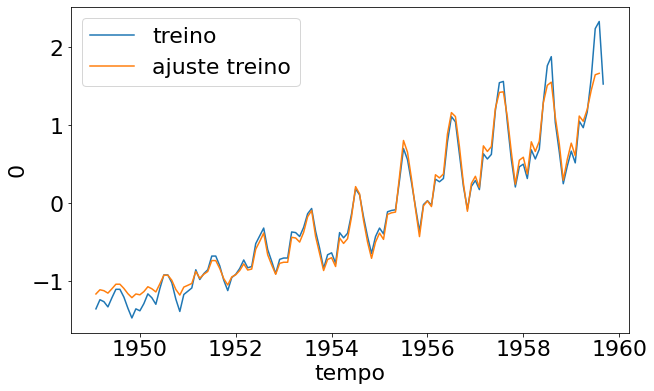

In [167]:
sns.lineplot(x='tempo', y=y_treino_novo ,data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0] ,data=passageiros[1:129], label='ajuste treino')

In [172]:
y_predict_teste_novo = regressor4.predict(x_teste_novo)

In [173]:

resultado = pd.DataFrame(y_predict_teste_novo)[0]

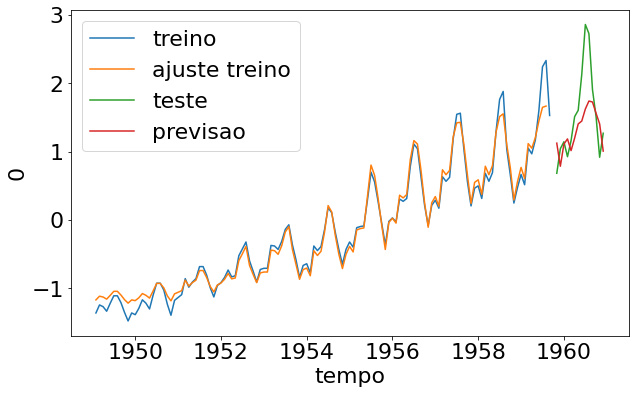

In [175]:
sns.lineplot(x='tempo', y=y_treino_novo ,data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0] ,data=passageiros[1:129], label='ajuste treino')
sns.lineplot(x='tempo', y=y_teste_novo,data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values ,data=passageiros[130:144], label='previsao')